In [11]:
import os

import pandas as pd
from matplotlib import pyplot as plt

In [12]:
def plot_measurements(
        path: str,
        df_id: str,
        measurements: pd.DataFrame,
        start_date: pd.Timestamp,
        end_date: pd.Timestamp,
):
    fig, plots = plt.subplots(ncols=2, nrows=2, figsize=(10, 10))

    data: pd.DataFrame = measurements[start_date:end_date]

    plots[0, 0].set_ylabel('TL', color='tab:red')
    plots[0, 0].plot(data.index, data['TL'], color='tab:red', label='TL')
    plots[0, 0].tick_params(axis='y', labelcolor='tab:red')
    plots[0, 0].set_ylabel('Temperature (°C)')
    plots[0, 0].grid(True)
    plots[0, 0].legend(loc='best')
    plots[0, 0].tick_params(axis='x', rotation=90)

    plots[0, 1].set_ylabel('P', color='tab:blue')
    plots[0, 1].plot(data.index, data['P'], color='tab:blue', label='P')
    plots[0, 1].tick_params(axis='y', labelcolor='tab:blue')
    plots[0, 1].set_ylabel('Pressure (hPa)')
    plots[0, 1].grid(True)
    plots[0, 1].legend(loc='best')
    plots[0, 1].tick_params(axis='x', rotation=90)

    plots[1, 0].set_ylabel('SO', color='tab:olive')
    plots[1, 0].plot(data.index, data['SO'], color='tab:olive', label='SO')
    plots[1, 0].tick_params(axis='y', labelcolor='tab:olive')
    plots[1, 0].set_ylabel('Sunshine Duration (s)')
    plots[1, 0].grid(True)
    plots[1, 0].legend(loc='best')
    plots[1, 0].tick_params(axis='x', rotation=90)

    plots[1, 1].set_ylabel('RF', color='tab:cyan')
    plots[1, 1].plot(data.index, data['RF'], color='tab:cyan', label='RF')
    plots[1, 1].tick_params(axis='y', labelcolor='tab:cyan')
    plots[1, 1].set_ylabel('Humidity (%)')
    plots[1, 1].grid(True)
    plots[1, 1].legend(loc='best')
    plots[1, 1].tick_params(axis='x', rotation=90)

    plt.suptitle('Measurements')
    plt.tight_layout()
    # plots.margins(x=0.01, y=0.01)

    # plots.grid(True)

    file_path = os.path.join(path, f"{df_id}.png")
    fig.savefig(file_path, format='png', bbox_inches='tight')

In [13]:
sim_data = pd.read_csv("simulations_data/sim_data.csv", index_col=0, parse_dates=True)

sim_data

,TL,P,RF,SO
time,,,,
2020-01-01 00:00:00,5.0,1012.4,60.0,0.0
2020-01-01 00:10:00,5.0,1012.5,60.0,0.0
2020-01-01 00:20:00,4.9,1012.5,61.0,0.0
2020-01-01 00:30:00,4.9,1012.5,61.0,0.0
2020-01-01 00:40:00,4.9,1012.6,60.0,0.0
...,...,...,...,...
2021-12-31 23:10:00,15.3,999.2,59.0,0.0
2021-12-31 23:20:00,15.2,999.3,59.0,0.0
2021-12-31 23:30:00,15.2,999.3,59.0,0.0


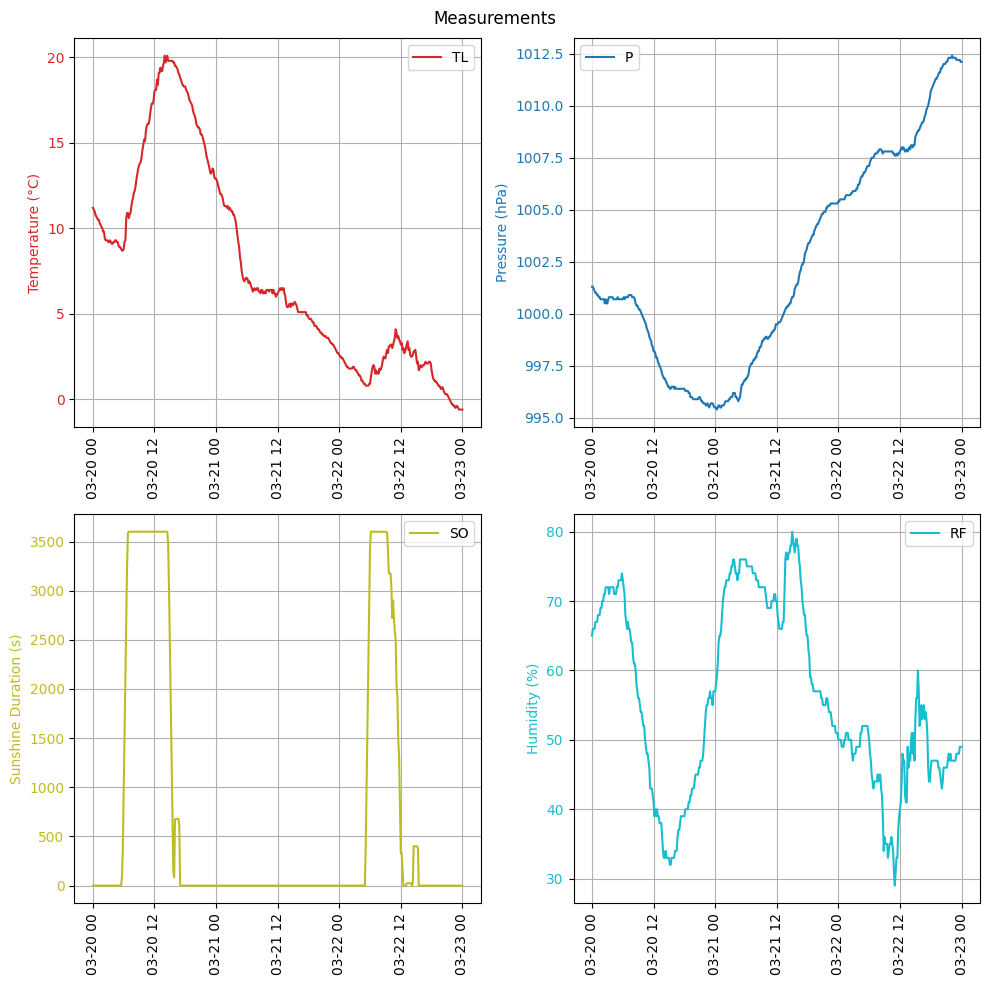

In [14]:
intervals = [
    (pd.Timestamp(day=20, month=3, year=2020), pd.Timestamp(day=23, month=3, year=2020)),
]

for interval in intervals:
    start_date = interval[0]
    end_date = interval[1]
    label = f"{start_date.year}-{start_date.month}-{start_date.day}_{end_date.year}-{end_date.month}-{end_date.day}"
    plot_measurements("simulations_data", label, sim_data, start_date, end_date)

In [15]:
data = pd.read_pickle("data/linz_2010_2019.pickle")

data

,TL,P,RF,SO
time,,,,
2010-01-01 01:00:00,5.5,962.0,96.0,0.0
2010-01-01 02:00:00,5.4,961.8,97.0,0.0
2010-01-01 03:00:00,5.2,961.4,97.0,0.0
2010-01-01 04:00:00,4.9,960.9,96.0,0.0
2010-01-01 05:00:00,4.1,960.8,96.0,0.0
...,...,...,...,...
2019-12-31 19:00:00,3.5,1002.6,69.0,0.0
2019-12-31 20:00:00,2.8,1002.9,72.0,0.0
2019-12-31 21:00:00,1.3,1003.2,80.0,0.0


In [16]:
data = pd.read_pickle("data/linz_2019_2019.pickle")

data

,TL,P,RF,SO
time,,,,
2019-01-01 00:00:00,4.1,1000.1,98.0,0.0
2019-01-01 01:00:00,4.2,1000.1,98.0,0.0
2019-01-01 02:00:00,4.3,999.8,99.0,0.0
2019-01-01 03:00:00,4.5,999.0,100.0,0.0
2019-01-01 04:00:00,4.8,997.9,100.0,0.0
...,...,...,...,...
2019-12-31 19:00:00,3.5,1002.6,69.0,0.0
2019-12-31 20:00:00,2.8,1002.9,72.0,0.0
2019-12-31 21:00:00,1.3,1003.2,80.0,0.0


In [17]:
data = pd.read_pickle("data/vienna_2010_2019.pickle")

data

,TL,P,RF,SO
time,,,,
2010-01-01 01:00:00,4.7,971.5,93.0,0.0
2010-01-01 02:00:00,4.7,971.2,93.0,0.0
2010-01-01 03:00:00,4.5,970.9,95.0,0.0
2010-01-01 04:00:00,5.0,970.4,92.0,0.0
2010-01-01 05:00:00,5.1,970.2,91.0,0.0
...,...,...,...,...
2019-12-31 19:00:00,6.1,1011.0,60.0,0.0
2019-12-31 20:00:00,5.6,1011.2,60.0,0.0
2019-12-31 21:00:00,5.5,1011.6,60.0,0.0


In [18]:
data = pd.read_pickle("data/vienna_2019_2019.pickle")

data

,TL,P,RF,SO
time,,,,
2019-01-01 00:00:00,4.4,1009.3,81.0,0.0
2019-01-01 01:00:00,4.7,1009.3,80.0,0.0
2019-01-01 02:00:00,5.2,1008.8,79.0,0.0
2019-01-01 03:00:00,5.3,1007.9,81.0,0.0
2019-01-01 04:00:00,5.6,1006.8,81.0,0.0
...,...,...,...,...
2019-12-31 19:00:00,6.1,1011.0,60.0,0.0
2019-12-31 20:00:00,5.6,1011.2,60.0,0.0
2019-12-31 21:00:00,5.5,1011.6,60.0,0.0


In [19]:
data = pd.read_pickle("data/vienna_2017_2019.pickle")

data

,TL,P,RF,SO
time,,,,
2017-01-01 00:00:00,-0.7,1006.3,82.0,0.0
2017-01-01 01:00:00,-1.8,1006.0,85.0,0.0
2017-01-01 02:00:00,-1.9,1005.4,83.0,0.0
2017-01-01 03:00:00,-1.5,1004.9,81.0,0.0
2017-01-01 04:00:00,-1.9,1004.2,83.0,0.0
...,...,...,...,...
2019-12-31 19:00:00,6.1,1011.0,60.0,0.0
2019-12-31 20:00:00,5.6,1011.2,60.0,0.0
2019-12-31 21:00:00,5.5,1011.6,60.0,0.0


In [20]:
data = pd.read_pickle("data/vienna_winter_2017_2019.pickle")

data

,TL,P,RF,SO
time,,,,
2017-01-01 00:00:00,-0.7,1006.3,82.0,0.0
2017-01-01 01:00:00,-1.8,1006.0,85.0,0.0
2017-01-01 02:00:00,-1.9,1005.4,83.0,0.0
2017-01-01 03:00:00,-1.5,1004.9,81.0,0.0
2017-01-01 04:00:00,-1.9,1004.2,83.0,0.0
...,...,...,...,...
2019-12-31 19:00:00,6.1,1011.0,60.0,0.0
2019-12-31 20:00:00,5.6,1011.2,60.0,0.0
2019-12-31 21:00:00,5.5,1011.6,60.0,0.0


In [21]:
data = pd.read_pickle("data/vienna_spring_2017_2019.pickle")

data

,TL,P,RF,SO
time,,,,
2017-03-01 00:00:00,7.2,980.4,70.0,0.0
2017-03-01 01:00:00,7.1,981.1,69.0,0.0
2017-03-01 02:00:00,7.5,980.8,65.0,0.0
2017-03-01 03:00:00,7.8,981.0,60.0,0.0
2017-03-01 04:00:00,7.6,982.2,62.0,0.0
...,...,...,...,...
2019-06-30 19:00:00,30.7,994.5,35.0,2263.0
2019-06-30 20:00:00,29.2,994.6,40.0,0.0
2019-06-30 21:00:00,28.1,994.7,44.0,0.0


In [22]:
data = pd.read_pickle("data/vienna_summer_2017_2019.pickle")

data

,TL,P,RF,SO
time,,,,
2017-06-01 00:00:00,21.6,998.5,56.0,0.0
2017-06-01 01:00:00,21.5,998.5,55.0,0.0
2017-06-01 02:00:00,21.1,998.2,56.0,0.0
2017-06-01 03:00:00,20.7,998.5,52.0,0.0
2017-06-01 04:00:00,20.4,999.0,51.0,0.0
...,...,...,...,...
2019-09-30 19:00:00,18.3,992.5,43.0,0.0
2019-09-30 20:00:00,17.6,993.2,46.0,0.0
2019-09-30 21:00:00,17.0,993.8,49.0,0.0


In [23]:
data = pd.read_pickle("data/vienna_autumn_2017_2019.pickle")

data

,TL,P,RF,SO
time,,,,
2017-09-01 00:00:00,21.2,994.5,73.0,0.0
2017-09-01 01:00:00,20.8,994.3,73.0,0.0
2017-09-01 02:00:00,20.5,994.0,75.0,0.0
2017-09-01 03:00:00,20.2,994.1,75.0,0.0
2017-09-01 04:00:00,20.0,994.1,75.0,0.0
...,...,...,...,...
2019-12-31 19:00:00,6.1,1011.0,60.0,0.0
2019-12-31 20:00:00,5.6,1011.2,60.0,0.0
2019-12-31 21:00:00,5.5,1011.6,60.0,0.0
